In [2]:
from scipy import constants as const
import pandas as pd
import plot_functions as p_func
import numpy as np
from scipy.optimize import curve_fit

In [3]:
## latex rendering
import matplotlib.pyplot as plt 


# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

In [4]:
c_scheme = p_func.c_scheme_02()

In [5]:
def volt_N(V_input):
    vmax = 0.3135176
    n0 = 8535254.64629534

    n = n0 * V_input / vmax

    return n

In [6]:
fname1 = "data_lifetime/scope_8.csv"
csv_data_1 = pd.read_csv(fname1, sep=",")

time1 = csv_data_1["second"] + 0.9
# volt1 = volt_N(csv_data_1["Volt4"] / 10)
volt1 = csv_data_1["Volt4"] / 10

fname2 = "data_lifetime/scope_9.csv"
csv_data_2 = pd.read_csv(fname2, sep=",")

time2 = csv_data_2["second"] + 0.9
# volt2 = volt_N(csv_data_2["Volt4"] / 10)
volt2 = csv_data_2["Volt4"] / 10


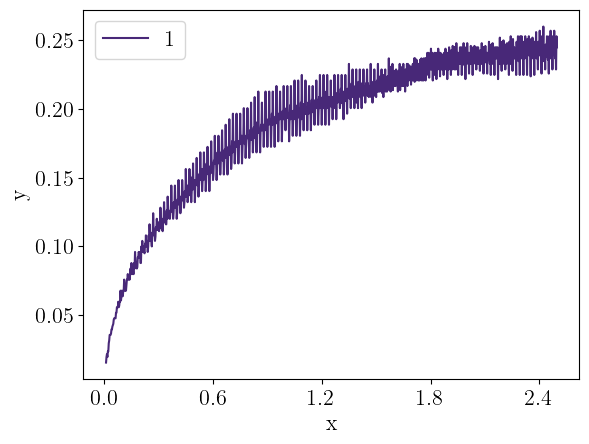

In [50]:
von1, zu1 = 644, -360

data_to_range = [
    [time1[von1:zu1], volt1[von1:zu1]-background_laser_on, "1", c_scheme[1], "-", ""],
]

p_func.plot_with_one_axis(data_to_range, name_x='x', name_y='y', plot_title='', filename_to_save='nosvg', marker_size='5', font_size=16, offset_text_size=16, legend_local='best', legend_size=16, x_ticks_limit=5, x_ticks_numstyle='sci', line_width=1.5, y_lim=None)

In [83]:
import numpy as np
from scipy.optimize import curve_fit

# Fit function
def fit_func(t, N0, yoffset, tau):
    return N0 * (1 - np.exp(-t / tau)) + yoffset

# Fit range
t_fit = np.linspace(time1[von1:zu1].min(), time1[von1:zu1].max(), 100)
guess = [8e6, 0, 0.2]

# Fit the data
popt, pcov = curve_fit(fit_func, time1[von1:zu1], volt1[von1:zu1] - background_laser_on, p0=guess)
y_fit = fit_func(t_fit, *popt)
y_guess = fit_func(t_fit, *guess)

# Compute y values of the fit at the original data points
y_model = fit_func(time1[von1:zu1], *popt)
y_data = volt1[von1:zu1] - background_laser_on

# R² calculation
ss_res = np.sum((y_data - y_model) ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Uncertainties from covariance matrix
perr = np.sqrt(np.diag(pcov))  # standard deviations of the parameters

# Output
print("Fit parameters with uncertainties:")
print(f"N0      = {popt[0]:.3e} ± {perr[0]:.3e}")
print(f"yoffset = {popt[1]:.3e} ± {perr[1]:.3e}")
print(f"tau     = {popt[2]:.3e} ± {perr[2]:.3e}")
print(f"R²      = {r_squared:.3f}")


Fit parameters with uncertainties:
N0      = 2.080e-01 ± 1.070e-03
yoffset = 3.801e-02 ± 1.178e-03
tau     = 6.974e-01 ± 9.880e-03
R²      = 0.975


In [26]:
# calculate background noise

background_laser_on = volt2[volt2 > 0.05].mean()
display(background_laser_on)

background_laser_off = volt2[volt2 < 0.02].mean()
display(background_laser_off)

0.05371464397260274

0.006864084500000001

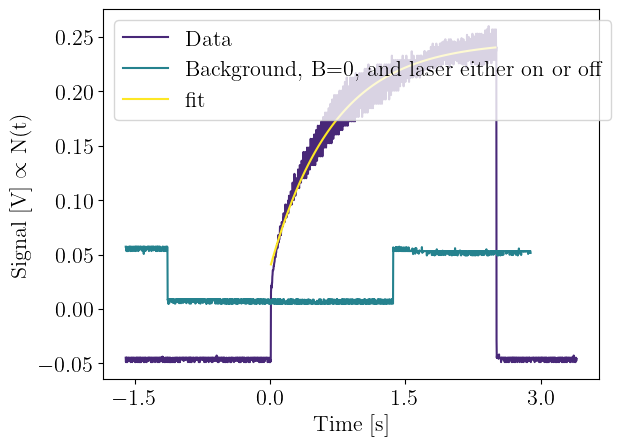

In [46]:
data_to_plot = [
    [time1, volt1-background_laser_on , "Data", c_scheme[1], "-", ""],
    [time2, volt2, "Background, B=0, and laser either on or off", c_scheme[4], "-", ""],

    # [t_fit, y_guess, "Initial Guess", c_scheme[7], "-", ""],
    [t_fit, y_fit, "fit", c_scheme[9], "-", ""],
]

p_func.plot_with_one_axis(data_to_plot, name_x='Time [s]', name_y=r'Signal [V] $\propto$ N(t)', plot_title='', filename_to_save='nosvg', marker_size='5', font_size=16, offset_text_size=16, legend_local='upper left', legend_size=16, x_ticks_limit=5, x_ticks_numstyle='sci', line_width=1.5, y_lim=None)

In [ ]:
cols = ["#808080", "#9B9B9B", "#B6B6B6", "#D1D1D1", "#EBEBEB"]

cols1 = ["#483C32", "#534438", "#5D4C3E", "#685444", "#725C4A"]

cols2 = ["#CCCCFF", "#A6A6E0", "#8080C0", "#5A5AA0", "#343480"]

cols3 = ["#DCD0FF", "#BFAFEF", "#A28EDE", "#856DCE", "#684BBD"] # nice

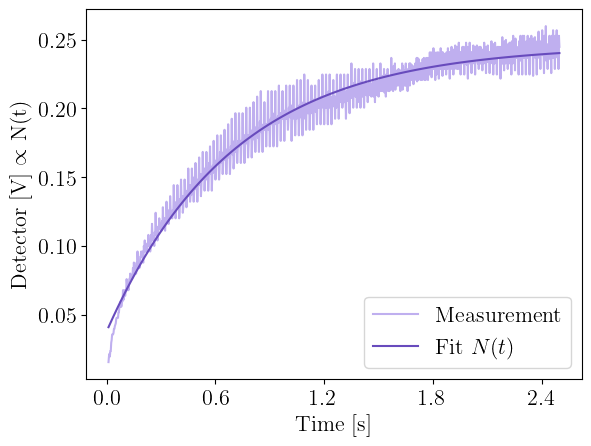

In [86]:
data_to_plot_cropped = [
    [time1[von1:zu1], (volt1-background_laser_on)[von1:zu1] , "Measurement", cols3[1], "-", ""],
    # [time2, volt2, "Background, B=0, and laser either on or off", c_scheme[4], "-", ""],

    # [t_fit, y_guess, "Initial Guess", c_scheme[7], "-", ""],
    [t_fit, y_fit, r"Fit $N(t)$", cols3[-1], "-", ""],
]

p_func.plot_with_one_axis(data_to_plot_cropped, name_x='Time [s]', name_y=r'Detector [V] $\propto$ N(t)', plot_title='', filename_to_save='../Figures/results_lifetime', marker_size='5', font_size=16, offset_text_size=16, legend_local='best', legend_size=16, x_ticks_limit=5, x_ticks_numstyle='sci', line_width=1.5, y_lim=None)

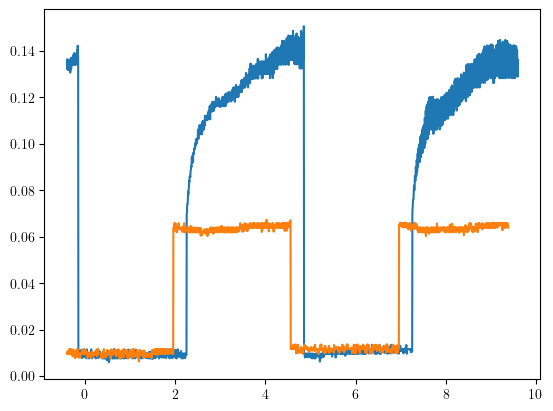

In [22]:
fname3 = "data_lifetime/scope_17.csv"
csv_data_3 = pd.read_csv(fname3, sep=",")

time3 = csv_data_3["second"]
volt3 = csv_data_3["Volt4"]

# volt3 = volt_N(csv_data_3["Volt4"] / 10)

fname4 = "data_lifetime/scope_18.csv"
csv_data_4 = pd.read_csv(fname4, sep=",")

time4 = csv_data_4["second"]
volt4 = csv_data_4["Volt4"]

plt.plot(time3, volt3)
plt.plot(time4, volt4)